In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv',sep = ',')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
print(data.isnull().any())

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool


In [4]:
data.duplicated().any()

True

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.duplicated().any()

False

In [7]:
data.isna().any()

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [8]:
corr = data.corr()
corr

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.205086,0.045504,0.099193,0.168213,-0.100404,-0.024805,...,0.025331,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659
HighBP,0.254318,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,...,0.052044,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030
HighChol,0.194944,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,...,0.052363,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089
CholCheck,0.072523,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,...,0.115498,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989
BMI,0.205086,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,...,-0.008519,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097
Smoker,0.045504,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,...,-0.013963,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314
Stroke,0.099193,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,...,0.013627,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,...,0.025987,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,...,0.023959,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,...,0.022659,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907


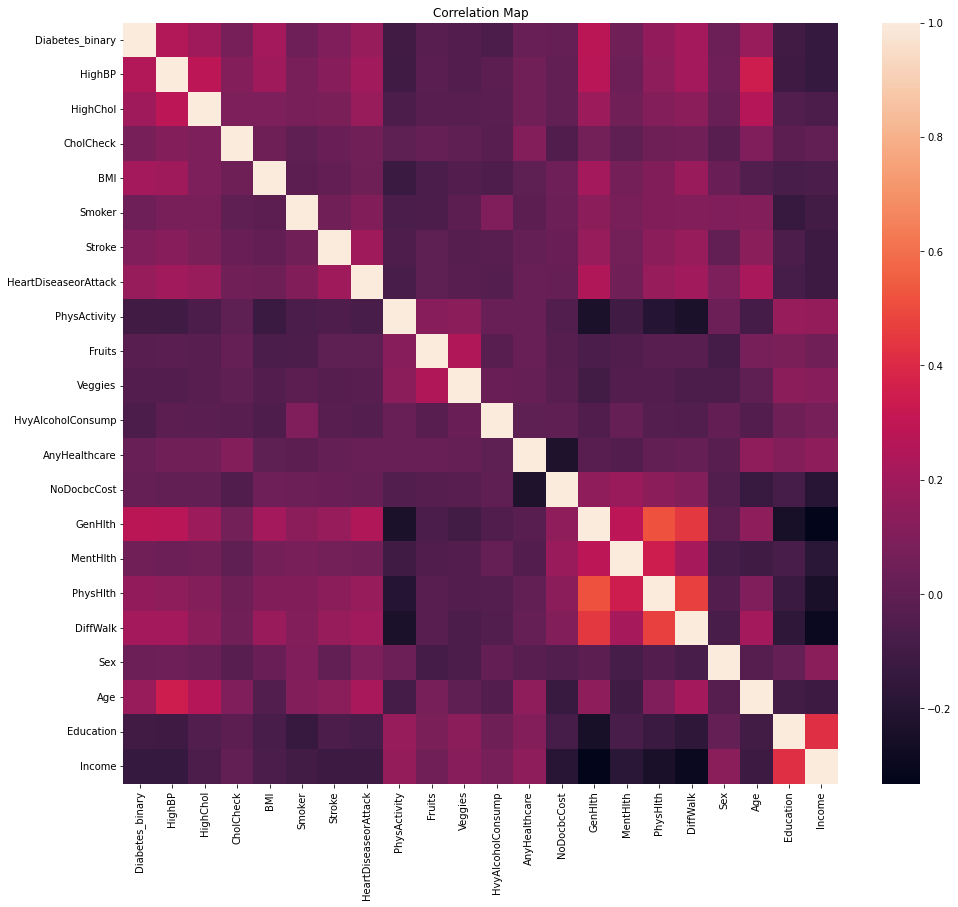

In [9]:
fig,axs = plt.subplots(figsize=(16,14))
ax = sns.heatmap(corr).set_title("Correlation Map")
plt.show()

In [10]:
data = data.drop(['CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','MentHlth','Sex'],axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   BMI                   229474 non-null  float64
 4   Stroke                229474 non-null  float64
 5   HeartDiseaseorAttack  229474 non-null  float64
 6   PhysActivity          229474 non-null  float64
 7   GenHlth               229474 non-null  float64
 8   PhysHlth              229474 non-null  float64
 9   DiffWalk              229474 non-null  float64
 10  Age                   229474 non-null  float64
 11  Education             229474 non-null  float64
 12  Income                229474 non-null  float64
dtypes: float64(13)
memory usage: 24.5 MB


In [12]:
data = data.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int32
 1   HighBP                229474 non-null  int32
 2   HighChol              229474 non-null  int32
 3   BMI                   229474 non-null  int32
 4   Stroke                229474 non-null  int32
 5   HeartDiseaseorAttack  229474 non-null  int32
 6   PhysActivity          229474 non-null  int32
 7   GenHlth               229474 non-null  int32
 8   PhysHlth              229474 non-null  int32
 9   DiffWalk              229474 non-null  int32
 10  Age                   229474 non-null  int32
 11  Education             229474 non-null  int32
 12  Income                229474 non-null  int32
dtypes: int32(13)
memory usage: 13.1 MB


In [13]:
data['Diabetes_binary'].value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

In [14]:
X = data.drop(['Diabetes_binary'],axis=1)
y = data['Diabetes_binary']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0    155564
1     28015
Name: Diabetes_binary, dtype: int64


D:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetes_binary', ylabel='count'>

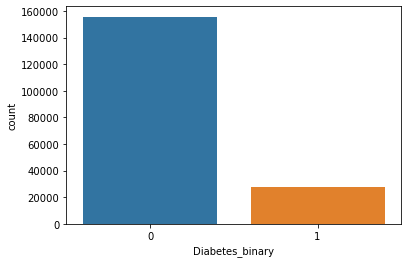

In [16]:
print(y_train.value_counts())
sns.countplot(y_train)

In [17]:
oversample = SMOTE(random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

1    155564
0    155564
Name: Diabetes_binary, dtype: int64


D:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetes_binary', ylabel='count'>

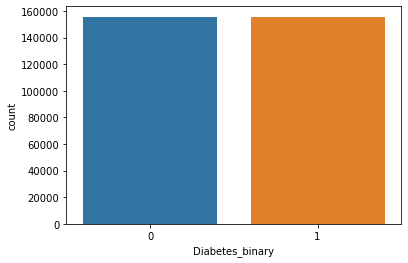

In [18]:
print(y_train.value_counts())
sns.countplot(y_train)

In [19]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

seed=123
kfold = model_selection.KFold(n_splits=7, random_state=seed, shuffle=True)
models = []
names = []

In [20]:
pipeline1 = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',LogisticRegression(C=1,random_state=42))])

param_grid1 = {'classifier__C': [0.01, 0.05, 0.1, 0.15, 0.2]}

grid1 = GridSearchCV(pipeline1, param_grid1, cv=kfold, scoring='accuracy')
grid1.fit(X_train, y_train)
print(grid1.best_params_)
names.append('LR')
models.append(grid1.best_estimator_)

{'classifier__C': 0.15}


In [21]:
pipeline2 = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',LinearSVC())])

param_grid2 = {'classifier__C': [0.0001,0.0005,0.001, 0.005, 0.01]}

grid2 = GridSearchCV(pipeline2, param_grid2, cv=kfold, scoring='accuracy')
grid2.fit(X_train, y_train)
print(grid2.best_params_)
names.append('LinearSVC')
models.append(grid2.best_estimator_)

{'classifier__C': 0.001}


In [22]:
pipeline3 = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier', GradientBoostingClassifier(n_estimators=1, learning_rate=0.5, random_state=42))])

param_grid3 = {'classifier__n_estimators': [20,50,80],
              'classifier__learning_rate': [0.2,0.5,0.8]}

grid3 = GridSearchCV(pipeline3, param_grid3, cv=kfold, scoring='accuracy')
grid3.fit(X_train, y_train)
print(grid3.best_params_)
names.append('GradientBoosting')
models.append(grid3.best_estimator_)

{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 80}


In [23]:
pipeline4 = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier', RandomForestClassifier())])

param_grid4 = {'classifier__n_estimators': [100, 200, 300],
              'classifier__min_samples_leaf': [2, 6, 10]}

grid4 = GridSearchCV(pipeline4, param_grid4, cv=kfold, scoring='accuracy')
grid4.fit(X_train, y_train)
print(grid4.best_params_)
names.append('RandomForest')
models.append(grid4.best_estimator_)

{'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 300}


In [24]:
pipeline5 = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))])

param_grid5 = {'classifier__min_samples_leaf': [50, 100, 150],
              'classifier__max_depth': [10, 15, 20]}

grid5 = GridSearchCV(pipeline5, param_grid5, cv=kfold, scoring='accuracy')
grid5.fit(X_train, y_train)
print(grid5.best_params_)
names.append('DecisionTree')
models.append(grid5.best_estimator_)

{'classifier__max_depth': 20, 'classifier__min_samples_leaf': 50}


In [25]:
pipeline6 = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier', AdaBoostClassifier(DecisionTreeClassifier(random_state=42)))])

param_grid6 = {'classifier__n_estimators': [30,50,70],
              'classifier__learning_rate': [0.3,0.5,0.7]}

grid6 = GridSearchCV(pipeline6, param_grid6, cv=kfold, scoring='accuracy')
grid6.fit(X_train, y_train)
print(grid6.best_params_)
names.append('AdaBoost')
models.append(grid6.best_estimator_)

{'classifier__learning_rate': 0.7, 'classifier__n_estimators': 70}


LR
              precision    recall  f1-score   support

           0       0.93      0.70      0.80     38813
           1       0.31      0.73      0.43      7082

    accuracy                           0.70     45895
   macro avg       0.62      0.71      0.61     45895
weighted avg       0.84      0.70      0.74     45895

LinearSVC
              precision    recall  f1-score   support

           0       0.93      0.69      0.80     38813
           1       0.30      0.73      0.43      7082

    accuracy                           0.70     45895
   macro avg       0.62      0.71      0.61     45895
weighted avg       0.84      0.70      0.74     45895



D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


GradientBoosting
              precision    recall  f1-score   support

           0       0.93      0.69      0.79     38813
           1       0.30      0.74      0.43      7082

    accuracy                           0.70     45895
   macro avg       0.62      0.71      0.61     45895
weighted avg       0.84      0.70      0.74     45895



D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RandomForest
              precision    recall  f1-score   support

           0       0.90      0.78      0.84     38813
           1       0.31      0.54      0.40      7082

    accuracy                           0.75     45895
   macro avg       0.61      0.66      0.62     45895
weighted avg       0.81      0.75      0.77     45895



D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


DecisionTree
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     38813
           1       0.30      0.67      0.41      7082

    accuracy                           0.70     45895
   macro avg       0.61      0.69      0.61     45895
weighted avg       0.83      0.70      0.74     45895

AdaBoost


D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.79      0.84     38813
           1       0.28      0.43      0.34      7082

    accuracy                           0.74     45895
   macro avg       0.58      0.61      0.59     45895
weighted avg       0.79      0.74      0.76     45895



D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


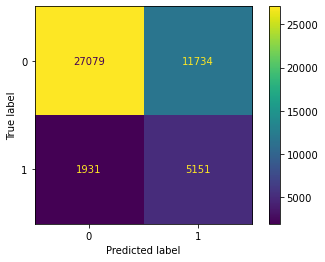

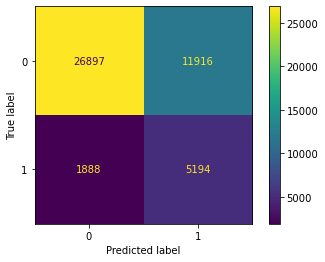

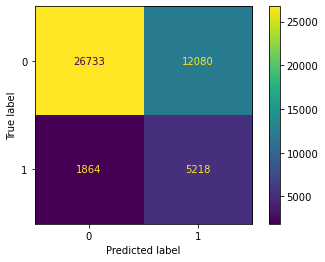

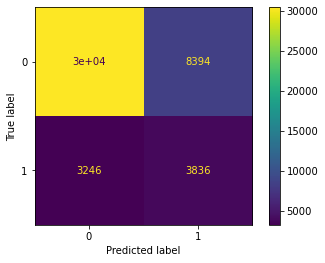

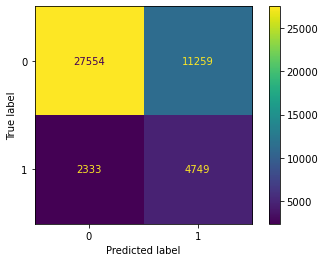

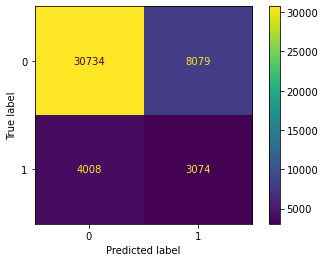

In [26]:
accuracy_score = []
i=0
for model in models:
  print(names[i])
  i+=1
  y_pred = model.predict(X_test)
  accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  plot_confusion_matrix(model,X_test,y_test)

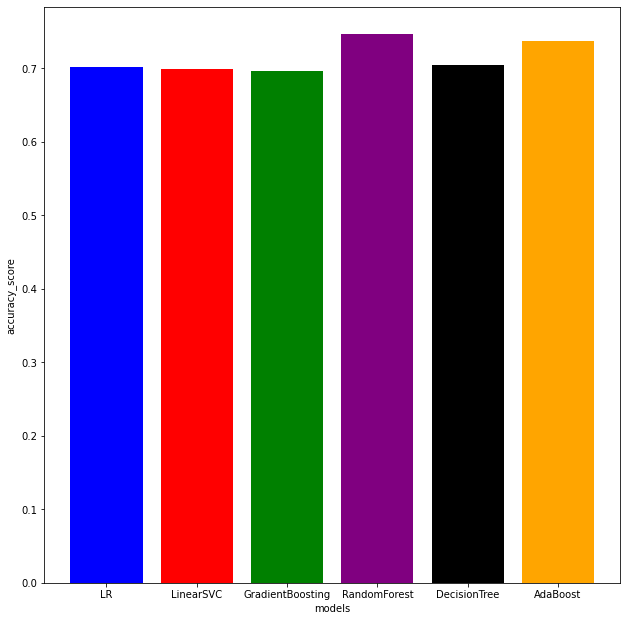

In [27]:
names = np.transpose(names)

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
plt.ylabel('accuracy_score')
plt.xlabel('models')
ax.bar(names,accuracy_score,color=['blue','red','green','purple','black','orange'])
plt.show()

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras.callbacks import TensorBoard
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

In [29]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [40]:
history_lr_1 = History()
model1 = Sequential()
model1.add(Dense(250,activation="sigmoid", input_shape=(X_train.shape[1],)))
model1.add(Dense(100,activation="sigmoid"))
model1.add(Dense(50,activation="sigmoid"))
model1.add(Dense(10,activation="sigmoid"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 250)               3250      
                                                                 
 dense_28 (Dense)            (None, 100)               25100     
                                                                 
 dense_29 (Dense)            (None, 50)                5050      
                                                                 
 dense_30 (Dense)            (None, 10)                510       
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________


In [41]:
model1.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)
model1.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=128, epochs=100,callbacks=[history_lr_1,early_stopping])

Epoch 1/100
2431/2431 [==============================] - 6s 2ms/step - loss: 0.5653 - accuracy: 0.7058 - val_loss: 0.5803 - val_accuracy: 0.6674
Epoch 2/100
2431/2431 [==============================] - 5s 2ms/step - loss: 0.5555 - accuracy: 0.7133 - val_loss: 0.5750 - val_accuracy: 0.6810
Epoch 3/100
2431/2431 [==============================] - 6s 2ms/step - loss: 0.5512 - accuracy: 0.7164 - val_loss: 0.6091 - val_accuracy: 0.6471
Epoch 4/100
2431/2431 [==============================] - 6s 2ms/step - loss: 0.5495 - accuracy: 0.7179 - val_loss: 0.5404 - val_accuracy: 0.6967
Epoch 5/100
2431/2431 [==============================] - 6s 2ms/step - loss: 0.5485 - accuracy: 0.7180 - val_loss: 0.5436 - val_accuracy: 0.7030
Epoch 6/100
2431/2431 [==============================] - 6s 2ms/step - loss: 0.5476 - accuracy: 0.7182 - val_loss: 0.5687 - val_accuracy: 0.6768
Epoch 7/100
2431/2431 [==============================] - 5s 2ms/step - loss: 0.5468 - accuracy: 0.7190 - val_loss: 0.5774 - val_ac

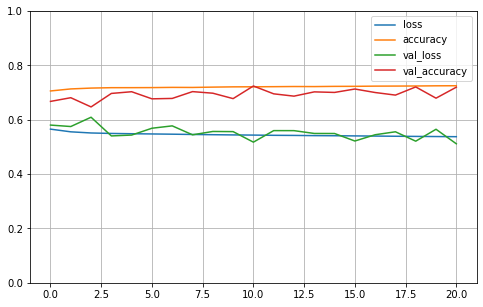

In [42]:
pd.DataFrame(history_lr_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
history_lr_2 = History()
model2 = Sequential()
model2.add(Dense(250,activation="relu",input_shape=(X_train.shape[1],)))
model2.add(Dense(100,activation="relu"))
model2.add(Dense(50,activation="relu"))
model2.add(Dense(10,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 250)               3250      
                                                                 
 dense_33 (Dense)            (None, 100)               25100     
                                                                 
 dense_34 (Dense)            (None, 50)                5050      
                                                                 
 dense_35 (Dense)            (None, 10)                510       
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________


In [44]:
model2.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)
model2.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=128,epochs=100, callbacks=[history_lr_2,early_stopping])

Epoch 1/100
2431/2431 [==============================] - 6s 2ms/step - loss: 0.5482 - accuracy: 0.7184 - val_loss: 0.5307 - val_accuracy: 0.7079
Epoch 2/100
2431/2431 [==============================] - 5s 2ms/step - loss: 0.5429 - accuracy: 0.7233 - val_loss: 0.5628 - val_accuracy: 0.6854
Epoch 3/100
2431/2431 [==============================] - 5s 2ms/step - loss: 0.5404 - accuracy: 0.7251 - val_loss: 0.5253 - val_accuracy: 0.7093
Epoch 4/100
2431/2431 [==============================] - 5s 2ms/step - loss: 0.5380 - accuracy: 0.7261 - val_loss: 0.5530 - val_accuracy: 0.6934
Epoch 5/100
2431/2431 [==============================] - 5s 2ms/step - loss: 0.5359 - accuracy: 0.7276 - val_loss: 0.5698 - val_accuracy: 0.6812
Epoch 6/100
2431/2431 [==============================] - 5s 2ms/step - loss: 0.5334 - accuracy: 0.7301 - val_loss: 0.5627 - val_accuracy: 0.6832
Epoch 7/100
2431/2431 [==============================] - 5s 2ms/step - loss: 0.5312 - accuracy: 0.7323 - val_loss: 0.5586 - val_ac

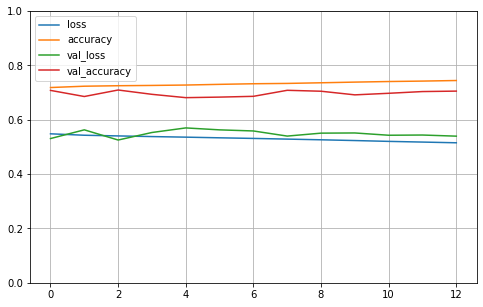

In [45]:
pd.DataFrame(history_lr_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
history_lr_3 = History()
model3 = Sequential()
model3.add(Dense(2500,activation="relu",input_shape=(X_train.shape[1],)))
model3.add(Dense(1500,activation="relu"))
model3.add(Dense(1000,activation="relu"))
model3.add(Dense(500,activation="relu"))
model3.add(Dense(100,activation="relu"))
model3.add(Dense(50,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 2500)              32500     
                                                                 
 dense_38 (Dense)            (None, 1500)              3751500   
                                                                 
 dense_39 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_40 (Dense)            (None, 500)               500500    
                                                                 
 dense_41 (Dense)            (None, 100)               50100     
                                                                 
 dense_42 (Dense)            (None, 50)                5050      
                                                                 
 dense_43 (Dense)            (None, 1)                

In [47]:
model3.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)
model3.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=256,epochs=100, callbacks=[history_lr_3,early_stopping])

Epoch 1/100
1216/1216 [==============================] - 75s 61ms/step - loss: 0.5501 - accuracy: 0.7183 - val_loss: 0.5924 - val_accuracy: 0.6679
Epoch 2/100
1216/1216 [==============================] - 73s 60ms/step - loss: 0.5444 - accuracy: 0.7219 - val_loss: 0.5811 - val_accuracy: 0.6838
Epoch 3/100
1216/1216 [==============================] - 75s 62ms/step - loss: 0.5421 - accuracy: 0.7239 - val_loss: 0.5476 - val_accuracy: 0.6784
Epoch 4/100
1216/1216 [==============================] - 78s 64ms/step - loss: 0.5400 - accuracy: 0.7258 - val_loss: 0.5658 - val_accuracy: 0.6751
Epoch 5/100
1216/1216 [==============================] - 82s 68ms/step - loss: 0.5371 - accuracy: 0.7280 - val_loss: 0.5925 - val_accuracy: 0.6715
Epoch 6/100
1216/1216 [==============================] - 78s 64ms/step - loss: 0.5345 - accuracy: 0.7306 - val_loss: 0.5554 - val_accuracy: 0.6897
Epoch 7/100
1216/1216 [==============================] - 78s 64ms/step - loss: 0.5305 - accuracy: 0.7339 - val_loss: 0

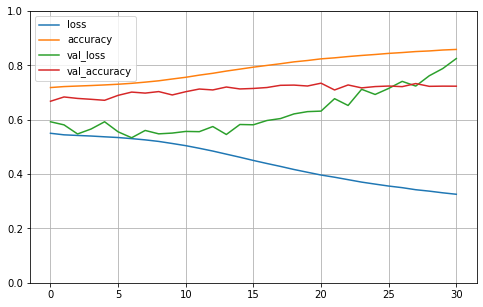

In [48]:
pd.DataFrame(history_lr_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()